# Preprocessing

### Importing libraries and datasets

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import functions as cf 

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm


In [13]:
combined_file_path = '../data/cleaned/winequality_combined_cleaned.csv' 
red_file_path = '../data/cleaned/winequality_red_cleaned.csv'
white_file_path = '../data/cleaned/winequality_white_cleaned.csv'
combined_df = pd.read_csv(combined_file_path)
red_df = pd.read_csv(red_file_path, index_col=0)
white_df = pd.read_csv(white_file_path, index_col=0)
red_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
def linear_regression(X_train, X_test, y_train, y_test):
    # Linear regression
    lm = LinearRegression()
    model = lm.fit(X_train, y_train)
    print(f'model coefficients:\n {model.coef_}\n')
    print(f'model intercept:\n {model.intercept_}\n')
    
    # Applying model to X test
    y_pred = model.predict(X_test)
    
    # Ensure y_test is in the correct format (pandas Series or 1D numpy array)
    if isinstance(y_test, pd.Series):
        y_test_reset = y_test.reset_index(drop=True)
    else:
        y_test_reset = y_test  # Assuming y_test is already a numpy array
    
    # Creating combined table with y_test and y_pred
    # Check if y_test_reset is a pandas Series and convert y_pred to a similar type
    if isinstance(y_test_reset, pd.Series):
        y_pred_series = pd.Series(y_pred, index=y_test_reset.index, name='y_pred')
        residuals_df = pd.concat([y_test_reset, y_pred_series], axis=1)
    else:
        # If inputs are numpy arrays, stack them horizontally
        residuals_df = np.column_stack((y_test_reset, y_pred))
        # Convert to DataFrame for easier manipulation later on
        residuals_df = pd.DataFrame(residuals_df, columns=["y_test", "y_pred"])
    
    # Calculating residuals
    residuals_df["residual"] = residuals_df["y_test"] - residuals_df["y_pred"]
    print(f'Residuals:\n {residuals_df}\n')

    # Root mean squared error
    rmse = mse(y_test_reset, residuals_df["y_pred"], squared=False)
    print(f'Root mean squared error: {rmse} \n')

    # R^2
    r2 = r2_score(y_test_reset, residuals_df["y_pred"])
    print(f'R2: {r2} \n')

    # Calculating adjusted R^2
    n = X_train.shape[0]  # Number of observations in the training set
    p = X_train.shape[1]  # Number of features used for training
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    print(f'Adjusted R2: {adjusted_r2} \n')

    return model.coef_




In [15]:
red_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Splitting data into X and y

In [16]:
#define X and Y

X = red_df.drop(['quality'], axis=1)
y = pd.DataFrame(red_df["quality"])

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

### Linear Regression Model 

In [17]:
# Linear regression
lm = LinearRegression()
model = lm.fit(X_train, y_train)
print(f'model coefficients:\n {model.coef_}\n')
print(f'model intercept:\n {model.intercept_}\n')

# Applying model to X test
y_pred = model.predict(X_test)
#y_pred = pd.DataFrame(scaler_s_y.inverse_transform(y_pred)) # inversing y
y_pred = pd.DataFrame(y_pred)

y_pred = y_pred.rename(columns = {0:"y_pred"})

y_test = y_test.reset_index(drop=True)
y_test = y_test.rename(columns = {"quality":"y_test"})

residuals_df = pd.concat([y_test,y_pred], axis = 1)
residuals_df["residual"] = residuals_df["y_test"] - residuals_df["y_pred"]


# Root mean squared error
rmse = mse(y_test, residuals_df["y_pred"], squared=False)
print(f'Root mean squared error: {rmse} \n')

# R^2
r2 = r2_score(y_test, residuals_df["y_pred"])
print(f'R2: {r2} \n')

# Calculating adjusted R^2
n = X_train.shape[0]  # Number of observations in the training set
p = X_train.shape[1]  # Number of features used for training
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R2: {adjusted_r2} \n')

residuals_df

model coefficients:
 [[-4.14972197e-02 -9.94118538e-01 -2.30359318e-02 -2.34947735e-03
  -2.04381921e+00  5.60218000e-03 -3.96020465e-03  2.31453631e+01
  -8.73151979e-01  9.07091584e-01  3.04300621e-01]]

model intercept:
 [-17.15994201]

Root mean squared error: 0.6377068568203348 

R2: 0.39830469246210143 

Adjusted R2: 0.3917320525585096 



,y_test,y_pred,residual
0,5,5.234221,-0.234221
1,6,5.800624,0.199376
2,7,6.387798,0.612202
3,5,5.155315,-0.155315
4,4,5.177987,-1.177987
...,...,...,...
335,5,5.374102,-0.374102
336,6,5.863342,0.136658
337,6,5.658077,0.341923
338,7,6.492629,0.507371


## Check for overfitting/underfitting

In [18]:
### Computing R2_scores for train_set

y_pred_train = pd.DataFrame(model.predict(X_train))

r2_train = r2_score(y_train,y_pred_train)
print(f'R2: {r2_train} \n')

# Calculating adjusted R^2
n = X_train.shape[0]  # Number of observations in the training set
p = X_train.shape[1]  # Number of features used for training
adjusted_r2_train = 1 - (1 - r2_train) * (n - 1) / (n - p - 1)
print(f'Adjusted R2: {adjusted_r2_train} \n')

R2: 0.347286492774302 

Adjusted R2: 0.34015655376786436 



## Feature Importance

In [19]:
#getting feature names and coefficients
feature_names = list(X_train.columns)
coefficients = model.coef_
coefficients = [i for i in coefficients[0]]

#creating feature importance dataframe
fi_dict = {"name":feature_names,"coeff":coefficients}
fi_df = pd.DataFrame(fi_dict)
fi_df = fi_df.sort_values('coeff', ascending=False)


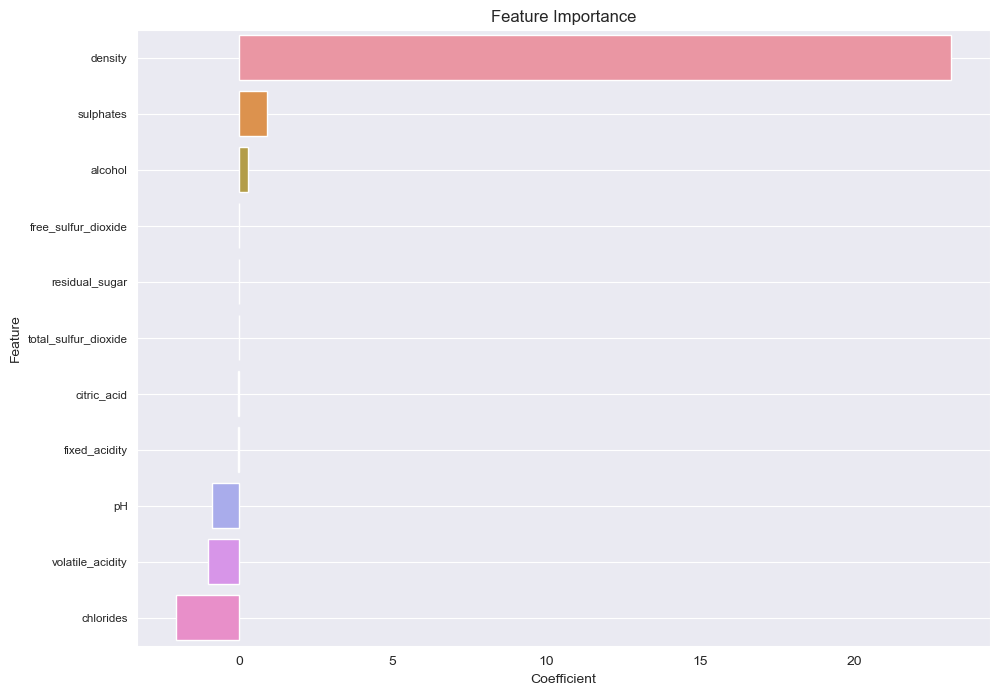

In [20]:
#Feature importance plot for standardized data
plt.figure(figsize=(11, 8))
sns.set_style("darkgrid")
sns.barplot(y="name", x="coeff", data=fi_df)
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.grid()
plt.xticks()
plt.yticks(fontsize='small')
plt.show()

### OLS Regression Results - before model optimization 

In [21]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     48.71
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           1.27e-85
Time:                        09:58:20   Log-Likelihood:                -1030.6
No. Observations:                1019   AIC:                             2085.
Df Residuals:                    1007   BIC:                             2144.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -17.1599     27.713     -0.619      0.536     -71.542      37.222
fixed_acidity           -0.0415      0.035     -1.201      0.230      -0.109       0.026
volatile_acidity        -0.9941      0.157     -6.320      0.000      -1.303      -0.685
citric_acid             -0.0230      0.189     -0.122      0.903      -0.394       0.348
residual_sugar          -0.0023      0.020     -0.115      0.909      -0.042       0.038
chlorides               -2.0438      0.513     -3.982      0.000      -3.051      -1.037
free_sulfur_dioxide      0.0056      0.003      1.950      0.051   -3.53e-05       0.011
total_sulfur_dioxide    -0.0040      0.001     -4.148      0.000      -0.006      -0.002
density                 23.1454     28.311      0.818      0.414     -32.410      78.700
pH                      -0.8732      0.261     -3.341      0.001      -1.386      -0.360
sulphates                0.9071      0.148      6.115      0.000       0.616       1.198
alcohol                  0.3043      0.034      8.840      0.000       0.237       0.372
==============================================================================
Omnibus:                       14.137   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.934
Skew:                          -0.177   Prob(JB):                     0.000128
Kurtosis:                       3.545   Cond. No.                     1.15e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np

# Add constant to X_train
X_train = sm.add_constant(X_train)

# Fit the OLS model
model = sm.OLS(y_train, X_train).fit()

# Get the predicted values
y_pred = model.predict(X_train)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred))

# Get the summary text
summary_text = model.summary().as_text()

# Append RMSE to the summary text
summary_text += f"\n\nRoot Mean Squared Error (RMSE): {rmse:.4f}"

# Print the updated summary
print(summary_text)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     48.71
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           1.27e-85
Time:                        10:02:54   Log-Likelihood:                -1030.6
No. Observations:                1019   AIC:                             2085.
Df Residuals:                    1007   BIC:                             2144.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -17.1599 